# Profitable Long Term Investments: An Analysis of American Housing Prices

## Introduction

As real estate can be a finicky industry, it is hugely important to understand where to buy a property and what property type will be the most profitable. In this analysis we will be analyzing property types in cities to determine which property type and location makes the most sense for a long term investment. The property type and location must meet our following requirements:

- First, we want to buy a property in a location that is steadily increasing in price, allowing a profit to be made when it is eventually sold. 

- Second, we want to determine which housing types are mispriced within the location chosen from the first requirment. The greater the misprice, the greater the deal may be when compared to the national average. 

- Lastly, due to budgetary reasons we want to buy in a relatively cheap city when compared to the national average.

### Summary of Results

Upon completion of the analysis, we have found that a 4 bedroom property in Jersey City, New Jersey is the best property to invest in given our requirements stated above.

Please refer to the full analysis below for a more in-depth exploration of housing prices and trends throughout America.


## Data Exploration

The data we will be using comes from the [Zillow Home Value Index](https://data.world/realestate/zillow-zip-zhvi). To follow along with this anlysis and run every cell correctly, you will need to download each document and place them in the same folder as this Jupyter Notebook.

Let's first explore one of the seven property type documents as they are all very similar to one another.

In [1]:
# Read in the first property type file
import pandas as pd

one = pd.read_csv('Zip_Zhvi_1bedroom.csv')

print(one.head(10))

   RegionID  RegionName           City State          Metro     CountyName  \
0     61639       10025       New York    NY       New York       New York   
1     84654       60657        Chicago    IL        Chicago           Cook   
2     61637       10023       New York    NY       New York       New York   
3     84616       60614        Chicago    IL        Chicago           Cook   
4     84640       60640        Chicago    IL        Chicago           Cook   
5     91733       77084        Houston    TX        Houston         Harris   
6     97564       94109  San Francisco    CA  San Francisco  San Francisco   
7     61630       10016       New York    NY       New York       New York   
8     84646       60647        Chicago    IL        Chicago           Cook   
9     74242       37211      Nashville    TN      Nashville       Davidson   

   SizeRank   1996-04   1996-05   1996-06   ...      2016-03   2016-04  \
0         1       NaN       NaN       NaN   ...     736600.0  74110

We can see this document shows monthly housing prices for a one bedroom property type throughout the United States. It looks as if there is some missing data starting in 1996 so the missing values can just be ignored when using this data for statistics.


In [2]:
# Read in the second property type data file
two = pd.read_csv('Zip_Zhvi_2bedroom.csv')

print(two.head(10))

   RegionID  RegionName           City State          Metro     CountyName  \
0     61639       10025       New York    NY       New York       New York   
1     84654       60657        Chicago    IL        Chicago           Cook   
2     61637       10023       New York    NY       New York       New York   
3     84616       60614        Chicago    IL        Chicago           Cook   
4     93144       79936        El Paso    TX        El Paso        El Paso   
5     84640       60640        Chicago    IL        Chicago           Cook   
6     91733       77084        Houston    TX        Houston         Harris   
7     97564       94109  San Francisco    CA  San Francisco  San Francisco   
8     91982       77494    Cinco Ranch    TX        Houston      Fort Bend   
9     62087       11375       New York    NY       New York         Queens   

   SizeRank   1996-04   1996-05   1996-06    ...        2016-03    2016-04  \
0         1       NaN       NaN       NaN    ...      1341300.0

This print out shows us that the 2 Bedroom property type documents are all the same, so that makes it fairly easy for us to deal with!

Now, we will need to look at the supplementary document which will help us understand what information is provided in the median value per square foot report.

In [3]:
# Read in the first supplementary document
mvpsf = pd.read_csv('Zip_MedianValuePerSqft_AllHomes.csv')

print(mvpsf.head(10))

   RegionID  RegionName           City State              Metro  \
0     61639       10025       New York    NY           New York   
1     84654       60657        Chicago    IL            Chicago   
2     61637       10023       New York    NY           New York   
3     84616       60614        Chicago    IL            Chicago   
4     93144       79936        El Paso    TX            El Paso   
5     61616       10002       New York    NY           New York   
6     84640       60640        Chicago    IL            Chicago   
7     91733       77084        Houston    TX            Houston   
8     97564       94109  San Francisco    CA      San Francisco   
9     90668       75070       McKinney    TX  Dallas-Fort Worth   

      CountyName  SizeRank  1996-04  1996-05  1996-06   ...     2016-03  \
0       New York         1      NaN      NaN      NaN   ...      1305.0   
1           Cook         2    134.0    134.0    133.0   ...       283.0   
2       New York         3      NaN  

This document outlines the median value per square foot for each month throughout various cities in the United states. This period ranges from 1996 to 2016 similarly to the property type document we examined previously.


## Data Analysis

### Data Collection

Now that we have reviewed the data, we need to make sure each of these documents can be accessed easily. To do this, a list of dataframes will be used so that each file can be accessed throughout the analysis. We have already read in the 1 and 2 bedroom property types, as well as the median value per square foot supplemental document. We only need to read in the 5 other property types now.

In [4]:
# Read in the last 5 property types

three = pd.read_csv('Zip_Zhvi_3bedroom.csv') 
four = pd.read_csv('Zip_Zhvi_4bedroom.csv') 
five = pd.read_csv('Zip_Zhvi_5BedroomOrMore.csv') 
condo = pd.read_csv('Zip_Zhvi_Condominum.csv') 
sfr = pd.read_csv('Zip_Zhvi_SingleFamilyResidence.csv') 

data_list = [mvpsf,one,two,three,four,five,condo,sfr]

Variable | Property Type
--- | ---
data_list[0] | 1 Bedroom Property
data_list[1] | 2 Bedroom Property
data_list[2] | 3 Bedroom Property
data_list[3] | 4 Bedroom Property
data_list[4] | 5 or more bedroom Property
data_list[5] | Condominium Property
data_list[6] | Single Family Residence Property


### Property Types

Now that the data has been read in, let's first look at the changing trends throughout the United States per property type for each month we have data for.

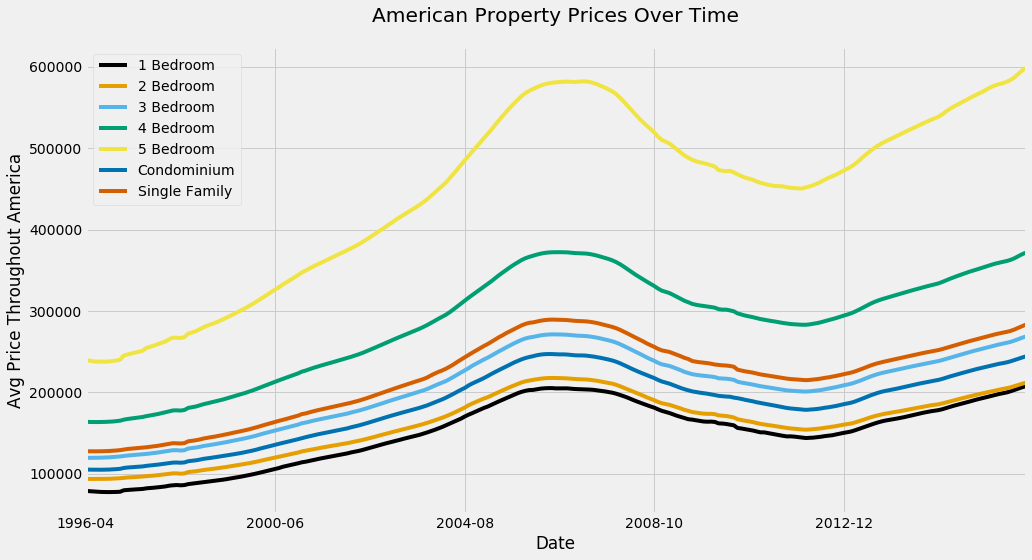

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Set variables that will be used throughout code
i=1

# Set our property types list so that it will be added when needed.
property_types = ['1 Bedroom','2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', 'Condominium', 'Single Family']

colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [240/255,228/255,66/255], [0,114/255,178/255], [213/255,94/255,0]]


while i < len(data_list):
    # Takes mean of each each month in file and keeps only city, and months
    means = data_list[i].mean().drop(['RegionID', 'RegionName', 'SizeRank'], axis = 0) 
    ax = means.plot(figsize = (15,8),c=colors[i-1])
    i += 1
    
ax.set_title("American Property Prices Over Time", y=1.04)
ax.set_xlabel("Date")
ax.set_ylabel("Avg Price Throughout America")
ax.legend(property_types,loc='upper left')
tick_labels = ax.xaxis.get_ticklabels()

plt.show()


In the above graph we can see that the housing market steadily increases from 1996 to roughly 2005. Here is where we start to see the market plateau and eventually crash. This corresponds exactly with the recession America faced at the start of 2008. We can see that just before 2012 the average price for all properties began to increase again and has continued to increase ever since.  

It seems that 4 and 5 bedroom property types have been increasing and decreasing in different rates from the rest of the property types. The 5 bedroom property type seems to be more volatile as it grows and shrinks more rapidly than the rest, with the 4 bedroom property type a close second. The rest of the property types seem to grow and shrink at the same pace as one another.

Lastly, it can be seen that the 3 bedroom property type is the best deal right now. The average price for a 3 bedroom property is roughly 275,000.00 across America. This means that you get more bang for your buck compared to the other houses. For example if you were to buy a 4 bedrooms house you would have to pay roughly 375,000.00 and for a 2 bedroom you would have to pay roughly 210,000.00. for only a 60,000.00 increase you can have 3 bedrooms. However, this does not take into account square footage, as we continue this analysis we may find that the better deal is not the 3 bedroom property

## Ranking Property Types

In this section we will write some code to rank the property types in each city from most expensive to least expensive. 

When a property type is ranked low, i.e. number 1, it is more expensive than all the other properties. When a property type is ranked high, i.e. number 7, the property type is the cheapest out of all property types. The most expensive will have a rank of 1, least expensive will have a rank of 7. This is definitely counterintuitive because normally we deal with the higher value being the correct answer, but in this case, it is the opposite.



In [6]:
unique_cities_all_types = []
all_data = [one,two,three,four,five,condo,sfr] #all house types datasets; doesn't include the median val per sq feet

for dataset in all_data:
    unique_cities = dataset.groupby('City').mean()['2016-12']
    unique_cities_all_types.append(unique_cities)

all_cities = pd.concat(unique_cities_all_types, axis = 1)

all_cities.reset_index(inplace = True)
all_cities.columns = ['City', '1 Bedroom', '2 Bedroom','3 Bedroom','4 Bedroom','5 Bedroom',
                      'Condominium', 'Single Family']
all_cities_dropped = all_cities.dropna().copy()

rank = all_cities.rank(numeric_only=True, axis = 1, ascending=False)
rank_final_all = pd.concat([all_cities.City.copy(), rank],axis = 1)
rank_final_dropped = rank_final_all.dropna()
print(rank_final_dropped)


                   City  1 Bedroom  2 Bedroom  3 Bedroom  4 Bedroom  \
5              Abington        7.0        5.0        4.0        2.0   
9                 Acton        7.0        5.0        4.0        2.0   
27               Agawam        7.0        5.0        4.0        2.0   
28         Agoura Hills        7.0        6.0        4.0        3.0   
31                 Aiea        7.0        6.0        4.0        2.0   
34                Akron        7.0        6.0        4.0        3.0   
41               Albany        1.0        7.0        4.0        3.0   
54           Alexandria        7.0        6.0        5.0        2.0   
59             Alhambra        7.0        5.0        4.0        2.0   
71            Allentown        6.0        7.0        5.0        1.0   
72             Alliance        7.0        6.0        4.0        3.0   
79               Alpine        6.0        5.0        4.0        3.0   
82             Altadena        7.0        6.0        4.0        3.0   
106   

Here is output of the average values for each property type, per city. We had to consolidate as many cities as we could because there is no point examining a city that doesn't have two or three of the property type data points. On that note. This allows us to drop any values that have NAN values as this data would not give us the full picture in deciding whether the location would be a good property investment location or not.

In [7]:
# Calculates the mean ranking for each property type

rank_final_dropped_mean = rank_final_dropped[property_types].mean()

print(rank_final_dropped_mean)


1 Bedroom        6.663953
2 Bedroom        5.463372
3 Bedroom        3.915116
4 Bedroom        2.031395
5 Bedroom        1.125581
Condominium      5.462791
Single Family    3.337791
dtype: float64


Here we can see the output form the mean ranking for each property type. Before we examine the results, let's create a graph of this data so we can better visualize it.

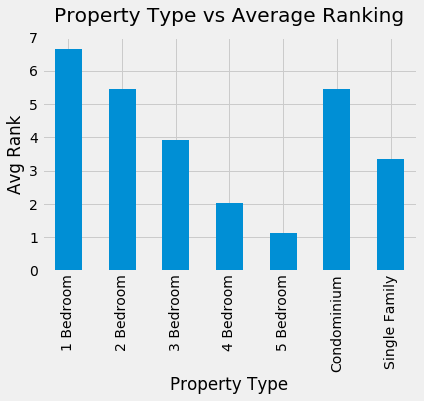

In [8]:
rank_final_dropped_mean.plot(kind='bar')
plt.title('Property Type vs Average Ranking', y=1.04)
plt.xlabel("Property Type")
plt.ylabel("Avg Rank")
plt.show()

In this graph we can see that a 5 bedroom property type is the most expensive property type as our scale is from most expensive 1 to least expensive 7. This is definitely counterintuitive because in this graph we would think the best performer is the largest amount, but in fact it is the opposite when we use a ranking system like this.

These values only include data for cities that have data for each property type. If any property types came up with an NAN value, they were removed from this analysis as this would not provide us with accurate results. We would only want to consider locations with full data.

In [9]:
# Calculates the typical real estate market for that given city

def calculate_similarity(row, average_ranks):
    #print(row)
    #print(average_ranks)
    return (row - average_ranks).abs().mean()


typical_property_value = rank_final_dropped.copy()

typical_property_value['Normality'] = typical_property_value[property_types].apply(
    calculate_similarity, args=(rank_final_dropped_mean,),axis=1)
                                                                                    
print(typical_property_value.head(10))                                                                                                                                                                
                                                                                    

            City  1 Bedroom  2 Bedroom  3 Bedroom  4 Bedroom  5 Bedroom  \
5       Abington        7.0        5.0        4.0        2.0        1.0   
9          Acton        7.0        5.0        4.0        2.0        1.0   
27        Agawam        7.0        5.0        4.0        2.0        1.0   
28  Agoura Hills        7.0        6.0        4.0        3.0        1.0   
31          Aiea        7.0        6.0        4.0        2.0        1.0   
34         Akron        7.0        6.0        4.0        3.0        1.0   
41        Albany        1.0        7.0        4.0        3.0        2.0   
54    Alexandria        7.0        6.0        5.0        2.0        1.0   
59      Alhambra        7.0        5.0        4.0        2.0        1.0   
71     Allentown        6.0        7.0        5.0        1.0        2.0   

    Condominium  Single Family  Normality  
5           6.0            3.0   0.273754  
9           6.0            3.0   0.273754  
27          6.0            3.0   0.273754 

On the far right we can now easily see which cities have a typical real estate market and which that do not. We will look at these separately and graph them to be easily examined in the next steps.

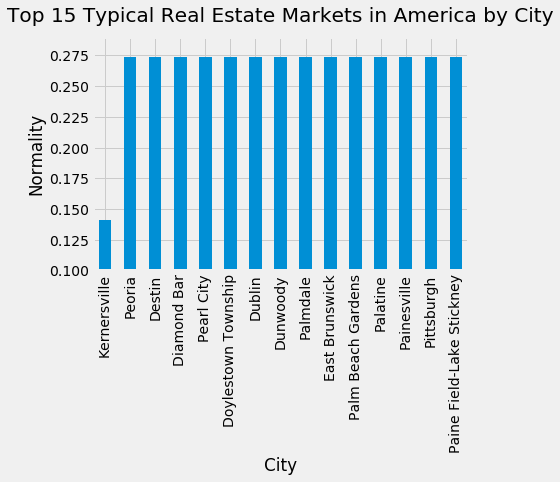

In [10]:
highly_normal = typical_property_value[['City','Normality']].sort_values(by='Normality',ascending=True)
highly_normal = highly_normal.set_index(keys='City')
ax = highly_normal.head(15).plot(kind='bar')
plt.title('Top 15 Typical Real Estate Markets in America by City', y=1.04)
plt.xlabel('City')
plt.ylabel('Normality')
ax.set_ylim([0.10,0.29])
ax.legend_.remove()
plt.show()

The above graph shows us the most typical real estate markets by city. We can see that the closer the value is to zero the lower the discrepancy is between the averages and the rankings by city. Kernersville is found to be the most typical out of our entire list.

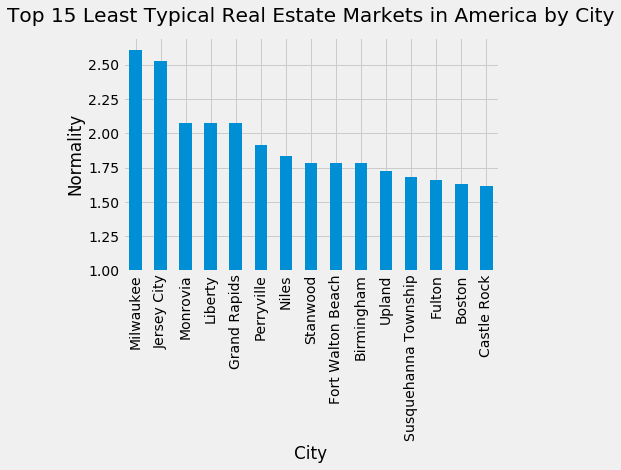

In [11]:
not_normal = typical_property_value[['City','Normality']].sort_values(by='Normality',ascending=False)
not_normal = not_normal.set_index(keys='City')
ax = not_normal.head(15).plot(kind='bar')
plt.title('Top 15 Least Typical Real Estate Markets in America by City', y=1.04)
plt.xlabel('City')
plt.ylabel('Normality')
ax.set_ylim([1.0,2.7])
ax.legend_.remove()
plt.show()

The above graph shows us the least typical real estate markets by city. We can see that the further the value is from zero the higher the discrepancy is between the averages and the rankings by city. Milwaukee is found to be the least typical out of our entire list, while Jersey City is a close second.

### Property Type Pricing Trends

Now that we have concluded which real estate markets are the most and least typical we can figure out which cities have the largest pricing trends between property types.

For this part of the analysis we will want to use the Median Value per Square Foot document which is labelled as mvpsf. We will be subtracting the most recent value subtracted by the oldest value we have on record for each city. This will give us the largest price increase as well as decrease across America to ultimately help us answer our question of where to buy a house.

This method will be used as it will give us the most data possible for pricing trends in each location. However in some locations we will notice that there is not very much data and many NAN values for some locations, this is a limitation of the data. Even though not all locations go back to 1996 it would still be important to see which locations have increased or decreased over a 5, 10, 15 or 20 year period. 

In [12]:
import numpy as np

median_square_foot = mvpsf[mvpsf['City'].isin(typical_property_value['City'].unique())].copy()

def calc_price_change(row):
    
    price_data = row[median_square_foot.columns[7:]]
    beg_price = price_data[price_data > 0].head(1).iloc[0]
    end_price = price_data[price_data > 0].tail(1).iloc[0]
    return ((end_price - beg_price)/beg_price) * 100

median_square_foot['Price Change (%)'] = median_square_foot.apply(calc_price_change,axis=1)

print(median_square_foot.head(20))

    RegionID  RegionName           City State                           Metro  \
1      84654       60657        Chicago    IL                         Chicago   
3      84616       60614        Chicago    IL                         Chicago   
6      84640       60640        Chicago    IL                         Chicago   
7      91733       77084        Houston    TX                         Houston   
8      97564       94109  San Francisco    CA                   San Francisco   
11     91940       77449        Cypress    TX                         Houston   
15     84646       60647        Chicago    IL                         Chicago   
16     74242       37211      Nashville    TN                       Nashville   
18     74101       37013      Nashville    TN                       Nashville   
20     84620       60618        Chicago    IL                         Chicago   
23     69816       28269      Charlotte    NC                       Charlotte   
25     96027       90046    



In the above printout, if we scroll to the far right we see that the 'Price Change (%)' is now the last column. This column outlines the largest and smallest price increases (or decreases). However, there are more than one entry per city here, so we need to be sure we take the average of each city before we can be sure of the price changes. In the next cell we will group all transactions by city and find the mean. Giving us a list of unique city names that have an overall average for the price change in percent.



In [13]:
unique_city_price_change = median_square_foot.groupby('City')['Price Change (%)'].mean()
print(unique_city_price_change)

City
Abington             115.542173
Acton                 74.368731
Agawam                98.029952
Agoura Hills         198.412698
Aiea                 169.461078
Akron                 20.552318
Albany                75.172434
Alexandria           136.032550
Alhambra             253.935933
Allentown             46.322537
Alliance              39.583333
Alpine               142.228101
Altadena             281.679389
Amherst               42.612380
Anacortes            154.166667
Anaheim              234.386816
Anchorage             54.121045
Anderson              48.458562
Ann Arbor            121.210541
Annapolis            165.442822
Apple Valley         136.717378
Aptos                225.153374
Arden                108.516624
Arlington            144.258640
Arlington Heights     66.548859
Arnold               111.951907
Arvada               157.484022
Asbury Park          129.411765
Ashburn              139.508793
Asheville            179.112339
                        ...    
Whi

Now that we have identified the price changes, both the 15 largest increases and decreases will be plotted to allow us to visually examine the data.

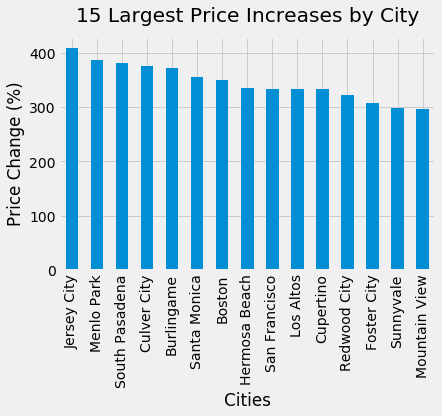

In [14]:
largest_15_increase = unique_city_price_change.sort_values(ascending=False).head(15)
ax = largest_15_increase.plot(kind='bar')
plt.title('15 Largest Price Increases by City', y=1.04)
plt.xlabel('Cities')
plt.ylabel('Price Change (%)')
plt.show()

We can see that Jersey City has over a 400% increase in mean price per square foot. The next closest is Menlo Park with slightly under a 400% increase in mean price per square foot. Now, let's look at the 15 largest price decreases by city.

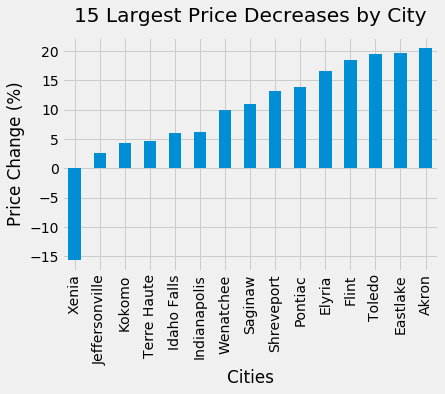

In [15]:
largest_15_decrease = unique_city_price_change.sort_values(ascending=True).head(15)
ax = largest_15_decrease.plot(kind='bar')
plt.title('15 Largest Price Decreases by City', y=1.04)
plt.xlabel('Cities')
plt.ylabel('Price Change (%)')
plt.show()

In the above graph we can see that the city with the largest decrease in mean price per square foot is Xenia which is just over a 15% decrease.

## Average Property Type Prices

We require one last piece of information before we can consolidate all information and find out which is the best location to buy a property. We need to determine how expensive each city is by calculating the average property type prices. We are going to take the average of all property type prices of a given city and create a list of most expensive to least expense and see if we can find any correlations between Price Changes, Rankings, and Average price of property types.

In [16]:


def calc_avg(row):
    property_types_val = row[property_types]
    return property_types_val.mean()
all_cities_dropped['Avg Cost'] = all_cities_dropped.apply(calc_avg, axis=1)

city_cost = all_cities_dropped[['City', 'Avg Cost']]
print(city_cost)

                   City       Avg Cost
5              Abington  256681.190476
9                 Acton  452500.000000
27               Agawam  189657.142857
28         Agoura Hills  805828.571429
31                 Aiea  633100.000000
34                Akron   89796.425301
41               Albany  271964.165358
54           Alexandria  522564.285714
59             Alhambra  582792.857143
71            Allentown  122623.809524
72             Alliance  102942.857143
79               Alpine  605433.333333
82             Altadena  861971.428571
106             Amherst  227133.877551
114           Anacortes  394500.000000
115             Anaheim  538071.428571
118           Anchorage  281092.212787
122            Anderson  142216.411565
130           Ann Arbor  319954.761905
134           Annapolis  536261.904762
146        Apple Valley  220300.000000
150               Aptos  873328.571429
161               Arden  258721.428571
169           Arlington  458658.578985
170   Arlington Heights  

The above is a print out of the average property type cost in a given city. To visualize this data we want to print the 30 largest cities and see what the average values are.

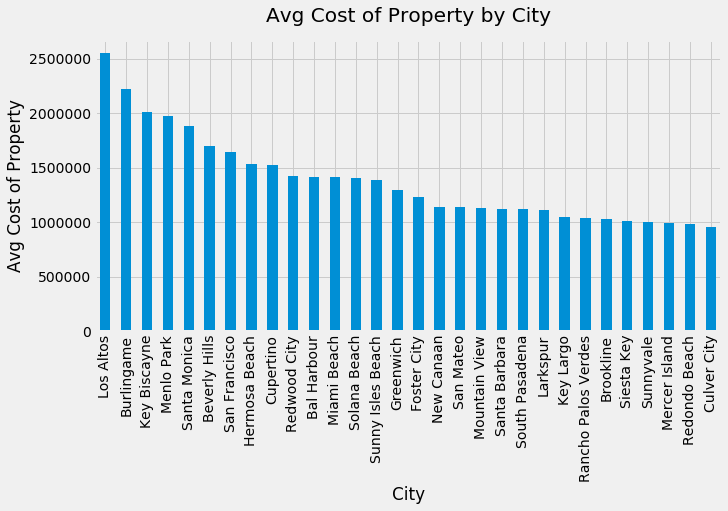

In [17]:
city_cost_sorted = city_cost.set_index(keys='City')
city_cost_sorted = city_cost_sorted.sort_values(by='Avg Cost',ascending=False).head(30)

ax = city_cost_sorted.plot(kind='Bar',figsize=(10,5))

plt.title('Avg Cost of Property by City', y=1.04)
plt.xlabel('City')
plt.ylabel('Avg Cost of Property')
ax.legend().set_visible(False)
plt.show()

Now that we know the relative cost of property types are within given cities we can start using all of the data we have gathered to determine where we want to buy a house.

## Choosing a Location and Property Type to Buy

In order to choose the location where we want to buy a house we first need to make sure our criteria from the introduction will be met. As a reminder, this is the criteria:

- We want to buy in a location that is steadily increasing in price, allowing us to hopefully make a profit when it is sold
- We want to determine which housing types are mispriced within this city, the further the misprice, the better the deal may be
- Due to budgetary reasons, we want to buy in a relatively cheap city

If we scroll up we can see that there are a few locations that have been steadily increasing. Let's look at the top 15 cities that have been increasing and see if any fit our requirements. 

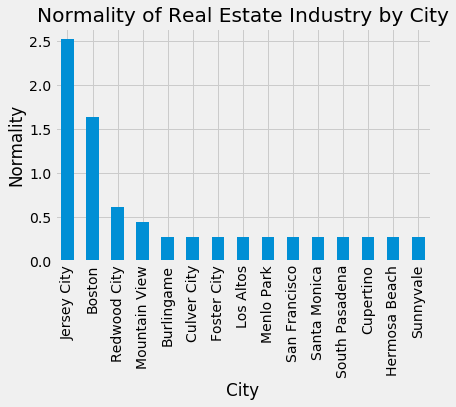

In [18]:
sorted_increasing = typical_property_value[typical_property_value['City'].isin(largest_15_increase.index)].sort_values(by='Normality',ascending=False)

ax = sorted_increasing.plot(kind='bar',x='City',y='Normality')
plt.title('Normality of Real Estate Industry by City')
plt.ylabel('Normality')
ax.legend_.remove()
plt.show()


In this graph we can see that Jersey City and Boston are the two cities that have the least typical real estate industries. Now, let's explore what the average price of property is at these two locations.

In [19]:
print(city_cost[city_cost['City'].isin(['Jersey City', 'Boston'])])

             City       Avg Cost
565        Boston  721009.964110
2864  Jersey City  410257.619048


We can see that of these two options, Jersey City is the cheaper of the two locations. Furthermore, looking back, Jersey City is also the largest change in price from 1996 in price per square foot. We will want to look here for a property to buy as it is cheap compared to the overal averages, it is also the second least typical location of a real-estate market and it has steadily grown in price since 1996.

Finally, to choose what type of property we will want to buy we will have to look at ranking types and compare it to the national average.

In [20]:
print(typical_property_value[typical_property_value['City'] == 'Jersey City'],'\n')
print('The average ranking is: \n', rank_final_dropped_mean)


             City  1 Bedroom  2 Bedroom  3 Bedroom  4 Bedroom  5 Bedroom  \
2864  Jersey City        6.0        4.0        2.0        7.0        5.0   

      Condominium  Single Family  Normality  
2864          3.0            1.0   2.526578   

The average ranking is: 
 1 Bedroom        6.663953
2 Bedroom        5.463372
3 Bedroom        3.915116
4 Bedroom        2.031395
5 Bedroom        1.125581
Condominium      5.462791
Single Family    3.337791
dtype: float64


We can see here that a Single Family property is actually the most expensive in Jersey City, while a 4 bedroom property type is the least expensive.

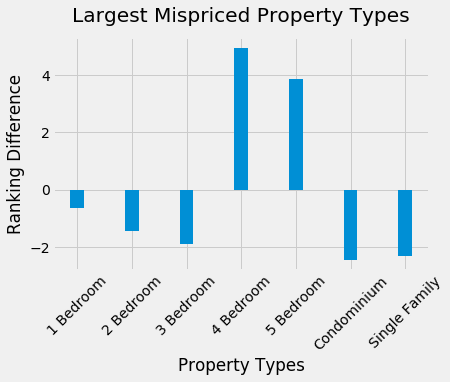

In [21]:
# This diff list is the difference between the assumed value and the mean property type.
diff = [6-6.66,4-5.46,2-3.92,7-2.03,5-1.12,3-5.46,1-3.33]

property_types = ['1 Bedroom','2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', 'Condominium', 'Single Family']

fig,ax = plt.subplots()
ax.bar([1,2,3,4,5,6,7],diff,width=0.25)
plt.title('Largest Mispriced Property Types', y=1.04)
plt.xlabel('Property Types')
plt.ylabel('Ranking Difference')
plt.xticks([1,2,3,4,5,6,7],property_types,rotation=45)
plt.show()

In this graph we can see that the largest positive difference refers to 4 bedroom property type. We can now conclude that the best deal is the 4 bedroom property type when compared to the national average in Jersey City

## Conclusion


In conclusion, we have found that the best property type and location to purchase is a 4 Bedroom property type in Jersey City. The reason for this is because it fits our criteria to a 'T'. First, it's pricing trend has been steadily increasing. Second, it's relatively cheap compared to the national averages. Lastly, we have found that the 4 Bedroom Property type is the largest mispriced property compared to national average in this location.